In [1]:
#Imports necessários para rodar o código
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time

In [2]:
#|--------------------------------------------------------------------------#
#|A função getBitsValue() recebe uma imagem e a posição do pixel central e |#
#|cria a cadeia de bits dada as regras definidas no LBP em que se o        |#
#|pixel central for maior que o pixel da borda, o valor 0 é atribuido      |#
#|a ele e se o pixel central for menor ou igual que o pixel da borda       |#
#|o valor 1 é atribuido a ele. A função retorna o inteiro representado     |#
#|por esta cadeia de bits gerada                                           |#
#|-------------------------------------------------------------------------|#
def getBitsValue(img, pos_x, pos_y):
    bits = ''
    middleValue = img[pos_x, pos_y]
    
    if middleValue > img[pos_x-1,pos_y-1]:
        bits += '0'
    else:
        bits += '1'
    
    if middleValue > img[pos_x,  pos_y-1]:
        bits += '0'
    else:
        bits += '1'
        
    if middleValue > img[pos_x+1,pos_y-1]:
        bits += '0'
    else:
        bits += '1'
        
    if middleValue > img[pos_x+1,pos_y]:
        bits += '0'
    else:
        bits += '1'
        
    if middleValue > img[pos_x+1,pos_y+1]:
        bits += '0'
    else:
        bits += '1'
    
    if middleValue > img[pos_x,  pos_y+1]:
        bits += '0'
    else:
        bits += '1'
        
    if middleValue > img[pos_x-1,pos_y+1]:
        bits += '0'
    else:
        bits += '1'
        
    if middleValue > img[pos_x-1,  pos_y]:
        bits += '0'
    else:
        bits += '1'

    return int(bits, 2)

#|-----------------------------------------------------------------------#
#|A função LBP_attributes() recebe uma imagem de tamanho [N,M] e aplica |#
#|a função getBitsValue para todos os pixels da imagem exceto os pixels |#
#|da borda e salva os resultados em um nova matriz de tamanho [N-1, M-1]|#
#|Apoś isso é criada uma lista chamada listBins em que será armazenada  |#
#|as quantidades de cada uma das possíveis 256 texturas. Por exemplo, no|#
#|indice 5 desta lista estará armazenado a quantidade de vezes que a    |#
#|textura representada pelo valor 5, ou seja '00000101' foi encontrada  |#
#|nesta nova matriz                                                     |#
#|----------------------------------------------------------------------|#
def LBP_attributes(img):
    num_rows, num_cols = img.shape
    newMatrix = np.zeros((num_rows-2, num_cols-2))
    
    # Para cada pixel da imagem, menos a borda
    for i in range(1,num_rows - 1):
        for j in range(1,num_cols - 1):
            val = getBitsValue(img, i, j)
            newMatrix[i-1, j-1] = val
            
    listBins = []
    for i in range(256):
        listBins.append(float(np.sum(newMatrix == i)))
    return listBins

# Cria dataset de treino para as imagens de nuvens e de florestas
### 30 imagens de cada classe para treino
#### Todas as imagens originais tem tamanho 1280x720

In [3]:
#Obtem os nomes dos arquivos nas pastas contendo as imagens de treino de nuvens e de florestas
filesNuvens = os.listdir('nuvensTrain')
filesForests = os.listdir('forestTrain')

# Cria uma lista para guardar as imagens do dataset de treino
img_train_data = []

# Para cada arquivo de imagem de florestas e de nuvens é realizada uma conversão para escala de cinza
# e então a imagem tem seu tamanho ajustado para 320x180 utiliazando a interpolação NEAREST, após isso
# cada imagem é salva na lista criada acima
for file in filesForests:
    img = cv2.imread('forestTrain/' + file, 0)
    resImg = cv2.resize(img, dsize=(320, 180), interpolation=cv2.INTER_NEAREST)
    img_train_data.append(resImg)  

for file in filesNuvens:
    img = cv2.imread('nuvensTrain/' + file, 0)
    resImg = cv2.resize(img, dsize=(320, 180), interpolation=cv2.INTER_NEAREST)
    img_train_data.append(resImg)

# Cria uma lista para guarda as listas de atributos de cada imagem
LBP_train_data = []

# Para cada imagem do dataset de treino, aplica-se a função LBP_attributes()
# e salva a lista de atributos em LBP_train_data
for i,img in enumerate(img_train_data):
    print('Imagem ', i + 1, ' processada e salva no dataset de treino')
    lbpAttributes = np.array(LBP_attributes(img))
    LBP_train_data.append(lbpAttributes.astype(np.float32))
LBP_train_data = np.array(LBP_train_data)
    
# Salva a lista de labels de cada imagem. Associando o valor 1 à classe 'Floresta'
# e o valor 2 à classe 'nuvem'
labels = []
tam = len(img_train_data)
for i in range(tam): # 60 imagens no dataset de treino
    if i < tam/2:
        labels.append([1]) # 1 = floresta
    else:
        labels.append([2]) # 2 = nuvem
labels = np.array(labels)

Imagem  1  processada e salva no dataset de treino
Imagem  2  processada e salva no dataset de treino
Imagem  3  processada e salva no dataset de treino
Imagem  4  processada e salva no dataset de treino
Imagem  5  processada e salva no dataset de treino
Imagem  6  processada e salva no dataset de treino
Imagem  7  processada e salva no dataset de treino
Imagem  8  processada e salva no dataset de treino
Imagem  9  processada e salva no dataset de treino
Imagem  10  processada e salva no dataset de treino
Imagem  11  processada e salva no dataset de treino
Imagem  12  processada e salva no dataset de treino
Imagem  13  processada e salva no dataset de treino
Imagem  14  processada e salva no dataset de treino
Imagem  15  processada e salva no dataset de treino
Imagem  16  processada e salva no dataset de treino
Imagem  17  processada e salva no dataset de treino
Imagem  18  processada e salva no dataset de treino
Imagem  19  processada e salva no dataset de treino
Imagem  20  processad

In [4]:
# Realiza o treinamento de um classificador KNN para o dataset de treino criado acima
knn = cv2.ml.KNearest_create()
knn.train(LBP_train_data, cv2.ml.ROW_SAMPLE, labels)

True

# Cria dataset de teste para as imagens de nuvens e de florestas

In [5]:
#Obtem os nomes dos arquivos nas pastas contendo as imagens de teste de nuvens e de florestas
filesNuvens = os.listdir('nuvensTest')
filesForests = os.listdir('forestTest')

# Cria uma lista para guardar as imagens do dataset de teste
img_test_data = []

# Para cada arquivo de imagem de florestas e de nuvens é realizada uma conversão para escala de cinza
# e então a imagem tem seu tamanho ajustado para 320x180 utiliazando a interpolação NEAREST, após isso
# cada imagem é salva na lista criada acima
for file in filesForests:
    img = cv2.imread('forestTest/' + file, 0)
    resImg = cv2.resize(img, dsize=(320, 180), interpolation=cv2.INTER_NEAREST)
    img_test_data.append(resImg)   
    
for file in filesNuvens:
    img = cv2.imread('nuvensTest/' + file, 0)
    resImg = cv2.resize(img, dsize=(320, 180), interpolation=cv2.INTER_NEAREST)
    img_test_data.append(resImg)
    
# Cria uma lista para guarda as listas de atributos de cada imagem para o test set
LBP_test_data = []

# Para cada imagem do dataset de treino, aplica-se a função LBP_attributes()
# e salva a lista de atributos em LBP_train_data
for i, img in enumerate(img_test_data):
    print('Imagem ', i + 1, ' processada e salva no dataset de teste')
    lbpAttributes = np.array(LBP_attributes(img))
    LBP_test_data.append(lbpAttributes.astype(np.float32))
LBP_test_data = np.array(LBP_test_data)
    
# Salva a lista de labels de cada imagem. Associando o valor 1 à classe 'Floresta'
# e o valor 2 à classe 'nuvem'
labels_test = []
tam = len(img_test_data)
for i in range(tam): # 14 imagens no dataset de teste
    if i < tam/2:
        labels_test.append([1]) # 1 = floresta
    else:
        labels_test.append([2]) # 2 = nuvem
labels_test = np.array(labels_test)

Imagem  1  processada e salva no dataset de teste
Imagem  2  processada e salva no dataset de teste
Imagem  3  processada e salva no dataset de teste
Imagem  4  processada e salva no dataset de teste
Imagem  5  processada e salva no dataset de teste
Imagem  6  processada e salva no dataset de teste
Imagem  7  processada e salva no dataset de teste
Imagem  8  processada e salva no dataset de teste
Imagem  9  processada e salva no dataset de teste
Imagem  10  processada e salva no dataset de teste
Imagem  11  processada e salva no dataset de teste
Imagem  12  processada e salva no dataset de teste
Imagem  13  processada e salva no dataset de teste
Imagem  14  processada e salva no dataset de teste


In [7]:
# Realiza a classificação dos dados de teste e salva os resultados
ret, result, neighbors, dist = knn.findNearest(LBP_test_data, k=3)
print('Done')

Done


In [8]:
print(result)
# 1 = Florestas
# 2 = Nuvens

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [9]:
# Compara o array de resultados com o de classes do test set calculado a
# acurácia do classificador
array_comp = result == labels_test
num_equal = np.sum(array_comp)
print('Acurácia = ', 100*num_equal/len(result))

Acurácia =  100.0


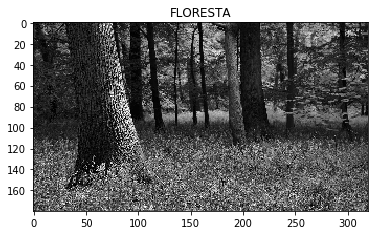

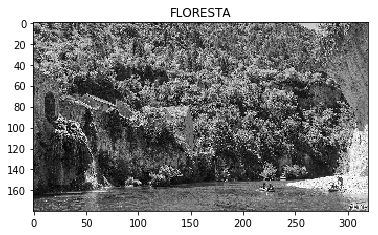

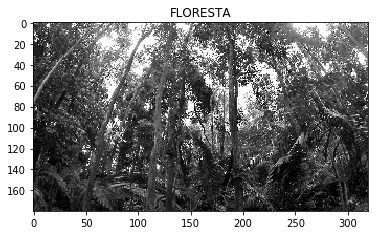

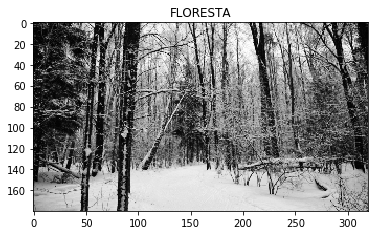

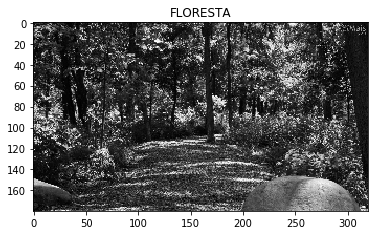

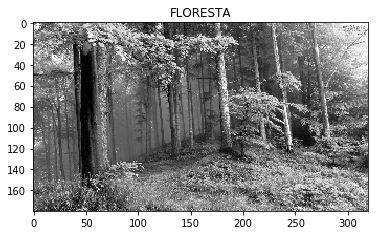

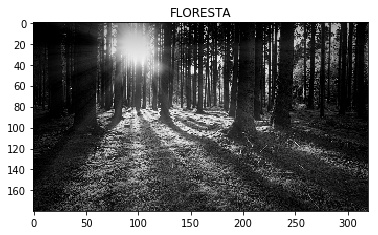

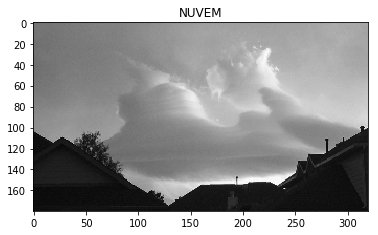

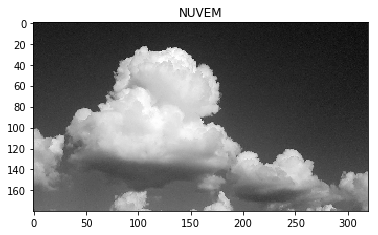

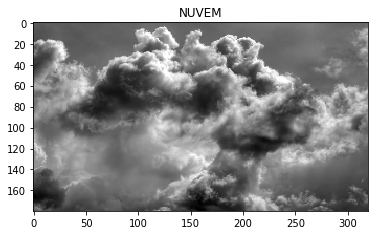

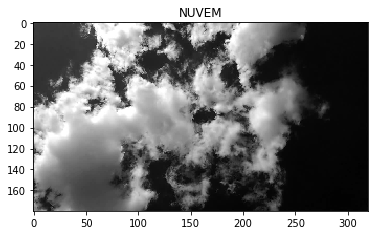

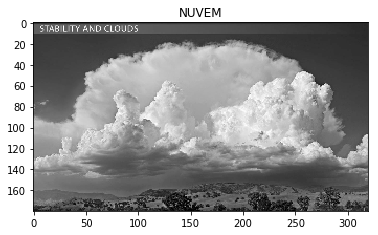

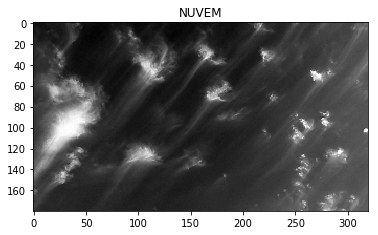

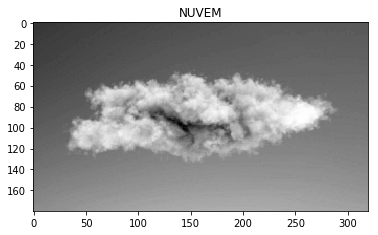

In [10]:
# Mostra todas as imagens de teste com sua respectiva classe atribuida
# pelo classificador
for i, img in enumerate(img_test_data):
    plt.figure()
    if result[i] == [1]:
        plt.title('FLORESTA')
    else:
        plt.title('NUVEM')
    plt.imshow(img, 'gray')